In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
train_data = pd.read_csv('/content/Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (17210, 785)
Shape of X after separating features: (17210, 784)


In [3]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (17210, 28, 28, 1)


In [4]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (17210, 10)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (13768, 28, 28, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7648 - loss: 0.7957 - val_accuracy: 0.9297 - val_loss: 0.2404
Epoch 2/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9370 - loss: 0.2062 - val_accuracy: 0.9407 - val_loss: 0.1933
Epoch 3/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9600 - loss: 0.1354 - val_accuracy: 0.9445 - val_loss: 0.1769
Epoch 4/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9746 - loss: 0.0887 - val_accuracy: 0.9532 - val_loss: 0.1614
Epoch 5/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9784 - loss: 0.0736 - val_accuracy: 0.9617 - val_loss: 0.1265
Epoch 6/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9853 - loss: 0.0505 - val_accuracy: 0.9538 - val_loss: 0.1634
Epoch 7/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9883 - loss: 0.0404 - val_accuracy: 0.9651 - val_loss: 0.1282
Epoch 8/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9939 - loss: 0.0247 - val_accuracy: 0.

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9593 - loss: 0.1603
Validation Accuracy: 95.90%


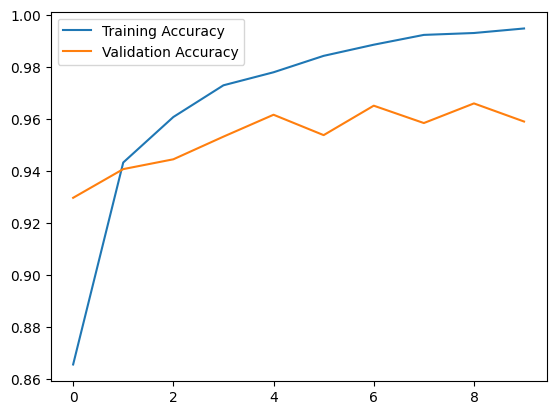

In [11]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


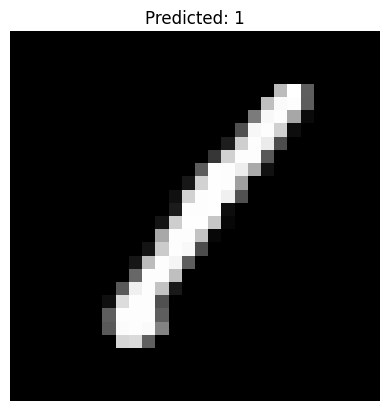

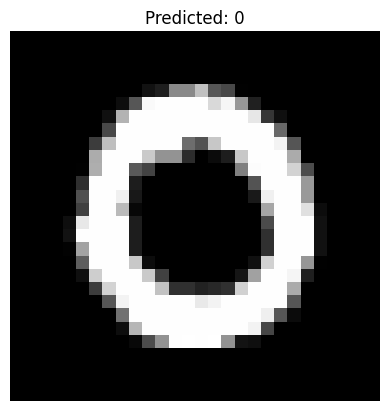

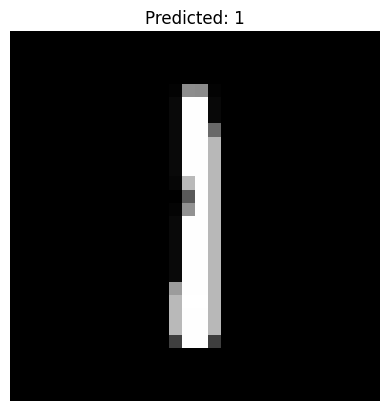

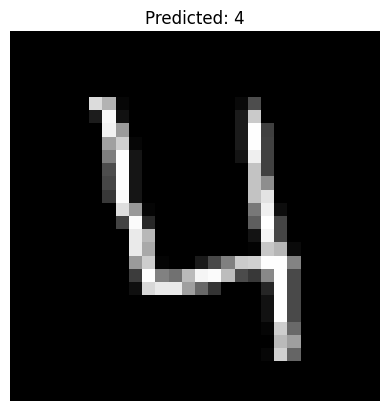

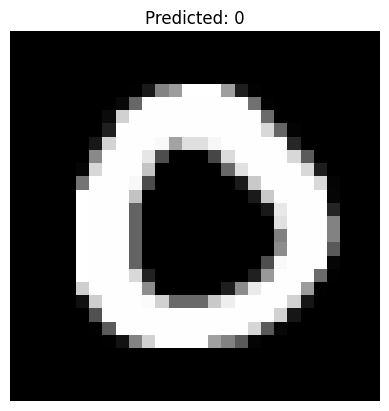

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


test_data = pd.read_csv('/content/Train.csv')


X_test = test_data.drop('label', axis=1).values / 255.0


X_test = X_test.reshape(-1, 28, 28, 1)


predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()
